In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
# import tensorflow as tf
# from tensorflow.keras import layers, regularizers, callbacks
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import warnings 
warnings.filterwarnings("ignore")

In [363]:
raw_df = pd.read_csv("../Output/Data/processed_data.csv")
raw_df.head(1)
raw_df['Price'] = raw_df['Price'] / 25500 # chuyển sang đô la
raw_df = raw_df.drop(columns=['CPU Name','GPU Name','Storage Type'])
df = raw_df

In [342]:
correlation_matrix = df.corr()
# print(correlation_matrix)

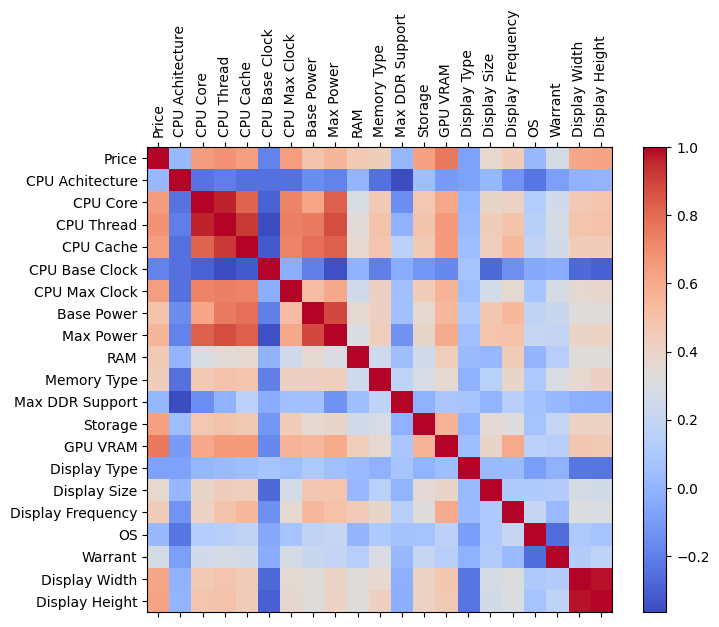

In [317]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()

# Set axis labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Show plot
plt.show()

In [361]:
# df['Display Resolution'] = raw_df['Display Height'] * raw_df['Display Width']
# df['Display Ratio'] = raw_df['Display Size'] / raw_df['Display Resolution']
# df = df.drop(columns=['Display Height','Display Width'])
# df['GPU VRAM 2'] = df['GPU VRAM']**2
# df['Storage Ratio'] = df['Storage'] / df['RAM']
# df['CPU Effecient'] = df['Base Power'] / df['CPU Core']
# df['CPU Max Effecient'] = df['Base Power'] / df['CPU Core']
# df['Display Frequency'] = df['Display Frequency']**2
#df = df.drop(columns=['CPU Achitecture','Max DDR Support','CPU Base Clock','Warrant'])

In [364]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test,y_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae}')

Mean squared error: 241971.2062595111
R2 Score: 0.7563936806737234
Mean absolute error: 345.4364382668299


# Model Selection, Training, Evaluation

In [355]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [356]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test,y_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae}')

Mean squared error: 225501.89246021069
R2 Score: 0.7729742853601098
Mean absolute error: 314.34693656504413


In [357]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
para = 0.015
# Lasso Regression (L1 regularization)
lasso = Lasso(alpha=para)  # Alpha is the regularization parameter (lambda)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print("Lasso MSE:", lasso_mse)

# Ridge Regression (L2 regularization)
ridge = Ridge(alpha=para)  # Alpha is the regularization parameter (lambda)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print("Ridge MSE:", ridge_mse)

Lasso MSE: 225488.84288656048
Ridge MSE: 225499.30613654855


In [358]:
forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)

forest.score(X_test_scaled, y_test)

0.815140877601734

In [359]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=45, max_samples=0.22),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': cb.CatBoostRegressor(silent=True)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate mean absolute error scores
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test,y_test_pred)
    
    # Print the name of the model and its mean absolute error scores
    print(f'{name}: Train MAE = {train_mae}') 
    print(f'{name}: Test MAE = {test_mae}')
    print(f'{name}: R2 = {r2}')
    print('***********************')

Linear Regression: Train MAE = 269.34161745179074
Linear Regression: Test MAE = 314.34693656504413
Linear Regression: R2 = 0.7729742853601098
***********************
Decision Tree: Train MAE = 14.026022563721622
Decision Tree: Test MAE = 245.0674731431034
Decision Tree: R2 = 0.751690306901721
***********************
Random Forest: Train MAE = 179.9914236978401
Random Forest: Test MAE = 263.7232070315305
Random Forest: R2 = 0.7931537837432272
***********************
Support Vector Machine: Train MAE = 540.9717825318796
Support Vector Machine: Test MAE = 609.0880124341685
Support Vector Machine: R2 = -0.12613647701518782
***********************
K-Nearest Neighbors: Train MAE = 221.0011266385007
K-Nearest Neighbors: Test MAE = 288.3663003663003
K-Nearest Neighbors: R2 = 0.7549030942536938
***********************
Gradient Boosting: Train MAE = 149.73380643425585
Gradient Boosting: Test MAE = 256.87833068583865
Gradient Boosting: R2 = 0.8118595531847197
***********************
AdaBoost: Tra